## Heart Disease Prediction (Binary Classification)

An attempt to build a machine learning model capable of predicting (based on their medical attributes) whether someone has heart disease or not.

**The approach:**
1. Problem Definition
2. Data Analysis:
  - Data
  - Evaluation
  - Features
3. Modeling
4. Experiment

---

## 1. Problem Definition

In a statement,
> Given medical attributes (clinical parameters) of a patient, can we predict whether that patient has heart disease or not?

---

## 2. Data Analysis

#### 2.1 Data

**Original Data is from:** https://archive.ics.uci.edu/ml/datasets/heart+disease

**We used the dataset of:** https://www.kaggle.com/ronitf/heart-disease-uci

**Attribute Information:**

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

#### 2.3 Features

1. **age** - age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - chest pain type
  - 0: Typical angina: chest pain related decrease blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (non heart related)
  - 3: Asymptomatic: chest pain not showing signs of disease
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
  - serum = LDL + HDL + .2 * triglycerides
  - above 200 is cause for concern
6. **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - '>126' mg/dL signals diabetes
7. **restecg** - resting electrocardiographic results
  - 0: Nothing to note
  - 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
  - 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. **thalach** - maximum heart rate achieved
9. **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excerci
11. **slope** - the slope of the peak exercise ST segment
  - 0: Upsloping: better heart rate with excercise (uncommon)
  - 1: Flatsloping: minimal change (typical healthy heart)
  - 2: Downslopins: signs of unhealthy heart
12. **ca** - number of major vessels (0-3) colored by flourosopy
  - colored vessel means the doctor can see the blood passing through
  - the more blood movement the better (no clots)
13. **thal** - thalium stress result
  - 1,3: normal
  - 6: fixed defect: used to be defect but ok now
  - 7: reversable defect: no proper blood movement when excercising
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

#### Import Library Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

#### Data Exploration

Find out more about the data

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. How to deal with missing data?
4. Where are the outliers and how to deal?
5. How to add, modify or remove features to get more out of the data?

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Naimul-Islam-Siam/Heart-Disease-Prediction/master/heart-disease.csv")
df. head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

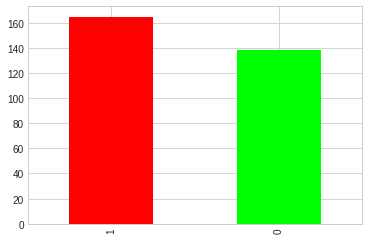

In [5]:
df["target"].value_counts().plot.bar(color=["red", "lime"]);

In [6]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


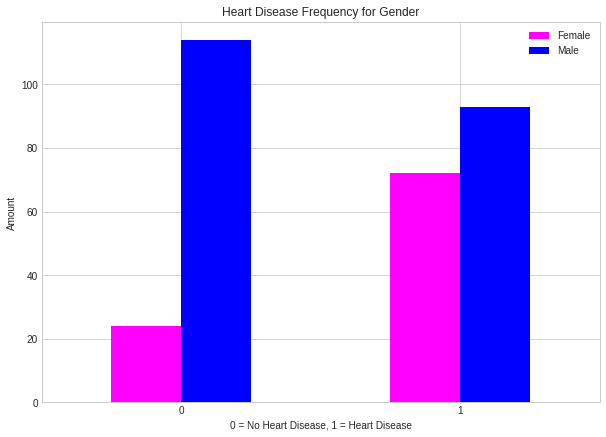

In [12]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["magenta", "blue"], figsize=(10, 7))
plt.legend(["Female", "Male"])
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [8]:
print(f"Based on THIS data, a female has {(72/(72+24))*100:.2f}% probability of having heart disease")
print(f"Based on THIS data, a male has {(93/(114+93))*100:.2f}% probability of having heart disease")

Based on THIS data, a female has 75.00% probability of having heart disease
Based on THIS data, a male has 44.93% probability of having heart disease
